In [1]:
# required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# import module sys to get the type of exception
import sys

In [2]:
train=pd.read_csv('train_IxoE5JN.csv',index_col='datetime')
test=pd.read_csv('test_WudNWDM.csv',index_col='datetime')

In [3]:
train.head()

,row_id,energy
datetime,,
2008-03-01 00:00:00,1,1259.985563
2008-03-01 01:00:00,2,1095.541500
2008-03-01 02:00:00,3,1056.247500
2008-03-01 03:00:00,4,1034.742000
2008-03-01 04:00:00,5,1026.334500


In [4]:
test.head()

,row_id
datetime,
2019-01-01 00:00:00,94993
2019-01-01 01:00:00,94994
2019-01-01 02:00:00,94995
2019-01-01 03:00:00,94996
2019-01-01 04:00:00,94997


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94992 entries, 2008-03-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   row_id  94992 non-null  int64  
 1   energy  93092 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.2+ MB


In [6]:
# Initally Droping Null Value 
train.energy.isna().sum()/len(train)*100

2.0001684352366516

### Missing Value Imputation

In [7]:
train.dropna(inplace=True)

In [8]:
# Checking for Null Value
print('Null value in energy col in pecentage : ',train.energy.isna().sum()/len(train)*100)

Null value in energy col in pecentage :  0.0


In [9]:
# Converting to date time

In [10]:
train.index=pd.to_datetime(train.index)
test.index=pd.to_datetime(test.index)

In [11]:
def date_time_features(ts_data,datetime='datetime'):
    '''
    Create Features from data frame using the df index 
    '''
    ts_data=ts_data.copy()
    ts_data['year']=ts_data.index.year
    ts_data['month']=ts_data.index.month
    ts_data['day']=ts_data.index.day
    ts_data['hour']=ts_data.index.hour
    ts_data['day_of_year']=ts_data.index.day_of_year
    ts_data['quater']=ts_data.index.quarter
    ts_data['day_of_week']=ts_data.index.day_of_week
    ts_data['week_of_the_year']=ts_data.index.weekofyear
    ts_data['is_weekend']=ts_data['day_of_week'].apply(lambda x : 1 if x==5 or x==6 else 0 )
    ts_data['is_morning']=ts_data['hour'].apply(lambda x : 1 if x>=6 and x<13 else 0)
    ts_data['is_afternoon']=ts_data['hour'].apply(lambda x : 1 if x>=13 and x<18 else 0)
    ts_data['is_evening']=ts_data['hour'].apply(lambda x : 1 if x>=18 and x<22 else 0)
    ts_data['is_night']=ts_data['hour'].apply(lambda x : 1 if x>=22 or x<6 else 0)
    
    return ts_data

In [12]:
train=date_time_features(train)
test=date_time_features(test)

In [13]:
train.corr()

,row_id,energy,year,month,day,hour,day_of_year,quater,day_of_week,week_of_the_year,is_weekend,is_morning,is_afternoon,is_evening,is_night
row_id,1.000000,0.612620,0.995815,0.054808,0.006830,0.000168,0.054670,0.054915,-0.000372,0.051633,-0.000424,0.000348,-0.000408,-0.000535,0.000439
energy,0.612620,1.000000,0.607429,0.062073,0.004261,0.320192,0.061294,0.069054,0.023735,0.061456,-0.059747,0.007548,0.147761,0.170252,-0.269092
year,0.995815,0.607429,1.000000,-0.036355,-0.001771,-0.000123,-0.036819,-0.033602,-0.000208,-0.037056,-0.000262,0.000431,-0.000452,-0.000716,0.000540
month,0.054808,0.062073,-0.036355,1.000000,0.009999,0.000408,0.996435,0.970778,-0.001804,0.968085,-0.001865,-0.000255,-0.000239,0.000541,0.000024
day,0.006830,0.004261,-0.001771,0.009999,1.000000,0.000171,0.094029,0.011497,0.000167,0.065340,0.001056,-0.000148,-0.000041,0.000019,0.000163
hour,0.000168,0.320192,-0.000123,0.000408,0.000171,1.000000,0.000419,0.000384,-0.000449,0.000299,-0.000333,-0.231462,0.259316,0.516606,-0.408580
day_of_year,0.054670,0.061294,-0.036819,0.996435,0.094029,0.000419,1.000000,0.967531,-0.001786,0.969382,-0.001767,-0.000264,-0.000239,0.000539,0.000035
quater,0.054915,0.069054,-0.033602,0.970778,0.011497,0.000384,0.967531,1.000000,-0.001155,0.943713,-0.001723,-0.000343,-0.000251,0.000596,0.000076
day_of_week,-0.000372,0.023735,-0.000208,-0.001804,0.000167,-0.000449,-0.001786,-0.001155,1.000000,-0.000685,0.790608,-0.000136,-0.001176,-0.000377,0.001442
week_of_the_year,0.051633,0.061456,-0.037056,0.968085,0.065340,0.000299,0.969382,0.943713,-0.000685,1.000000,-0.001198,-0.000338,-0.000149,0.000417,0.000125


<AxesSubplot:>

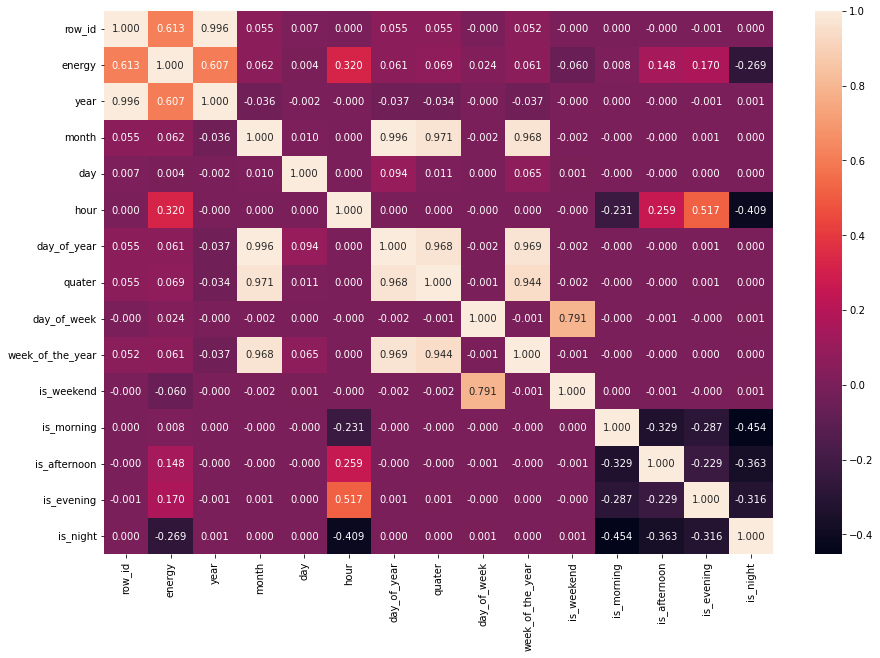

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True,fmt='0.3f')

In [15]:
train_set=train[(train.index<='28-02-2018')]
valid_set=train[(train.index>'28-02-2018')]

In [16]:
#train_set

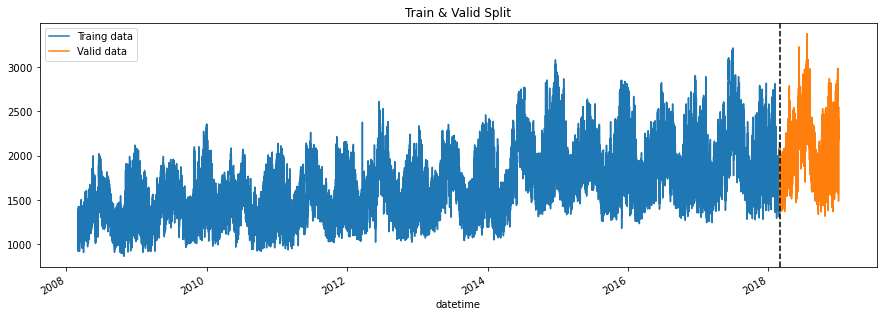

In [17]:
fig,ax=plt.subplots(figsize=(15,5))
train_set['energy'].plot(ax=ax,label='Traing data',title='Train & Valid Split')
valid_set['energy'].plot(ax=ax,label='Valid data')
ax.axvline('28-02-2018',color='black',ls='--')
ax.legend()
plt.show()

In [18]:
import xgboost as xgb

In [19]:
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
xtrain=train_set.drop(['energy'],axis=1)
ytrain=train_set.energy

xtest=valid_set.drop(['energy'],axis=1)
ytest=valid_set.energy

In [21]:
reg_model=xgb.XGBRegressor(n_estimators=1000,
                        early_stopping_rounds=50)
reg_model.fit(xtrain,ytrain,
             eval_set=[(xtrain,ytrain),(xtest,ytest)],verbose=10)

[0]	validation_0-rmse:1205.41889	validation_1-rmse:1509.20181
[10]	validation_0-rmse:133.55862	validation_1-rmse:251.39545
[20]	validation_0-rmse:108.90947	validation_1-rmse:224.58504
[30]	validation_0-rmse:98.59887	validation_1-rmse:228.47236
[40]	validation_0-rmse:90.42412	validation_1-rmse:223.54889
[50]	validation_0-rmse:84.69288	validation_1-rmse:226.82229
[60]	validation_0-rmse:80.63524	validation_1-rmse:226.69669
[70]	validation_0-rmse:75.38202	validation_1-rmse:225.84491
[80]	validation_0-rmse:71.81688	validation_1-rmse:226.08703
[88]	validation_0-rmse:68.45994	validation_1-rmse:226.05557


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [22]:
ypred=reg_model.predict(xtest)

In [23]:
r2_score(ytest,ypred)

0.599232102163346

0 - 0.5670194316316716
<br>
1 - 0.5173743541385102

In [24]:
mean_squared_error(ytest,ypred)

49790.879383028965

0 - 53792.9394325132
<br>1 - 59898.62084758878

In [25]:
predicted_data=pd.DataFrame(ypred,index=ytest.index) 

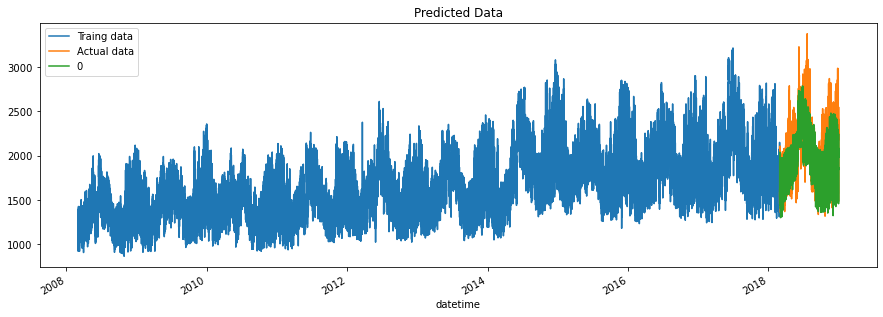

In [26]:
fig,ax=plt.subplots(figsize=(15,5))
ytrain.plot(ax=ax,label='Traing data',title='Predicted Data')
ytest.plot(ax=ax,label='Actual data')
predicted_data.plot(ax=ax,label='predicted data')
#ax.axvline('09-01-2020',color='black',ls='--')
ax.legend()
plt.show()

In [27]:
#Actual data
xtrain=train.drop(['energy'],axis=1)
ytrain=train.energy

xtest=test
#ytest=valid_set.energy

In [28]:
Actual_pred=reg_model.predict(xtest)

In [29]:
Actual_pred

array([1821.8291, 1662.2579, 1598.6407, ..., 2091.6301, 2180.1438,
       2036.1454], dtype=float32)

In [30]:
xtest['energy']=Actual_pred

In [31]:
base_model=xtest[['row_id','energy']]

In [33]:
base_model.to_csv('base_model_2.csv',index=False)